In [ ]:
import pandas as pd
import numpy as np

raw = pd.read_csv('./../dataset/solar_system_positions_with_velocity.csv')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Load the dataset (assuming it's already loaded from previous steps, but re-loading for completeness)
df = pd.read_csv('./dataset/solar_system_positions_with_velocity.csv')

# --- Preprocessing the 'name' column (same as before) ---
barycenter_planets = [
    '1 MERCURY BARYCENTER', '2 VENUS BARYCENTER', '3 EARTH BARYCENTER',
    '4 MARS BARYCENTER', '5 JUPITER BARYCENTER', '6 SATURN BARYCENTER',
    '7 URANUS BARYCENTER', '8 NEPTUNE BARYCENTER', '9 PLUTO BARYCENTER'
]
moons = [
    '301 MOON', '601 MIMAS', '602 ENCELADUS', '603 TETHYS', '604 DIONE', '605 RHEA',
    '606 TITAN', '607 HYPERION', '608 IAPETUS', '609 PHOEBE', '612 HELENE',
    '613 TELESTO', '614 CALYPSO', '632 METHONE', '634 POLYDEUCES',
    '901 CHARON', '902 NIX', '903 HYDRA', '904 KERBEROS', '905 STYX'
]
sun = '10 SUN'

df['simplified_name'] = df['name'].copy()
df.loc[df['simplified_name'].isin(moons), 'simplified_name'] = 'MOON/SATELLITE'
df.loc[df['simplified_name'] == sun, 'simplified_name'] = 'SUN'

allowed_simplified_names = barycenter_planets + ['SUN', 'MOON/SATELLITE']
df_filtered = df[df['simplified_name'].isin(allowed_simplified_names)].copy()

df_filtered['simplified_name'] = df_filtered['simplified_name'].replace({
    '1 MERCURY BARYCENTER': 'MERCURY_BARYCENTER',
    '2 VENUS BARYCENTER': 'VENUS_BARYCENTER',
    '3 EARTH BARYCENTER': 'EARTH_BARYCENTER',
    '4 MARS BARYCENTER': 'MARS_BARYCENTER',
    '5 JUPITER BARYCENTER': 'JUPITER_BARYCENTER',
    '6 SATURN BARYCENTER': 'SATURN_BARYCENTER',
    '7 URANUS BARYCENTER': 'URANUS_BARYCENTER',
    '8 NEPTUNE BARYCENTER': 'NEPTUNE_BARYCENTER',
    '9 PLUTO BARYCENTER': 'PLUTO_BARYCENTER'
})

# Identify features (X) and target (y) for the filtered DataFrame
features = ['x_au', 'y_au', 'z_au', 'vx_au_per_day', 'vy_au_per_day', 'vz_au_per_day']
X = df_filtered[features]
y = df_filtered['simplified_name']

# Encode the categorical 'simplified_name' column into numerical labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
# knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
# Make predictions on the test set
# y_pred = knn.predict(X_test)
y_pred = rf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9998


In [10]:
df_filtered['simplified_name']

0        MERCURY_BARYCENTER
1        MERCURY_BARYCENTER
2        MERCURY_BARYCENTER
3        MERCURY_BARYCENTER
4        MERCURY_BARYCENTER
                ...        
63940        MOON/SATELLITE
63941        MOON/SATELLITE
63942        MOON/SATELLITE
63943        MOON/SATELLITE
63944        MOON/SATELLITE
Name: simplified_name, Length: 54810, dtype: object

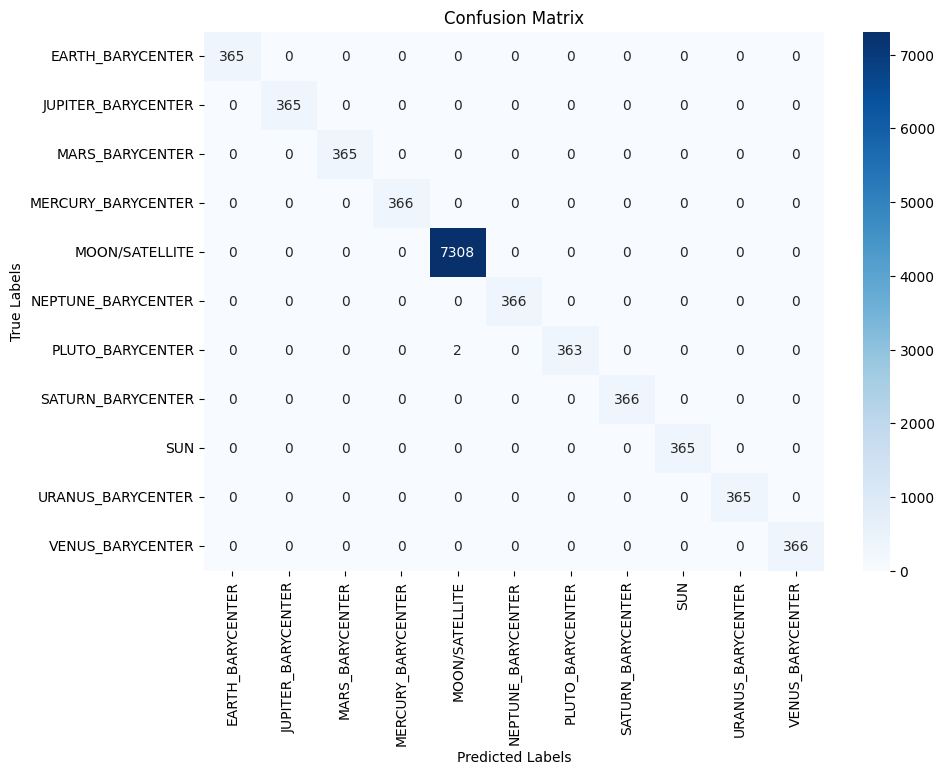

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class names for heatmap labels
# Ensure df_filtered is available from the previous cell
class_names = sorted(df_filtered['simplified_name'].unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Load the dataset (assuming it's already loaded from previous steps, but re-loading for completeness)
df = pd.read_csv('./dataset/solar_system_positions_with_velocity.csv')

# --- Preprocessing the 'name' column (same as before) ---
barycenter_planets = [
    '1 MERCURY BARYCENTER', '2 VENUS BARYCENTER', '3 EARTH BARYCENTER',
    '4 MARS BARYCENTER', '5 JUPITER BARYCENTER', '6 SATURN BARYCENTER',
    '7 URANUS BARYCENTER', '8 NEPTUNE BARYCENTER', '9 PLUTO BARYCENTER'
]
moons = [
    '301 MOON', '601 MIMAS', '602 ENCELADUS', '603 TETHYS', '604 DIONE', '605 RHEA',
    '606 TITAN', '607 HYPERION', '608 IAPETUS', '609 PHOEBE', '612 HELENE',
    '613 TELESTO', '614 CALYPSO', '632 METHONE', '634 POLYDEUCES',
    '901 CHARON', '902 NIX', '903 HYDRA', '904 KERBEROS', '905 STYX'
]
sun = '10 SUN'

df['simplified_name'] = df['name'].copy()
# df.loc[df['simplified_name'].isin(moons), 'simplified_name'] = 'MOON/SATELLITE'
df.loc[df['simplified_name'] == sun, 'simplified_name'] = 'SUN'


allowed_simplified_names = barycenter_planets + moons + ['SUN', 'MOON/SATELLITE']
df_filtered = df[df['simplified_name'].isin(allowed_simplified_names)].copy()

df_filtered['simplified_name'] = df_filtered['simplified_name'].replace({
    '1 MERCURY BARYCENTER': 'MERCURY_BARYCENTER',
    '2 VENUS BARYCENTER': 'VENUS_BARYCENTER',
    '3 EARTH BARYCENTER': 'EARTH_BARYCENTER',
    '4 MARS BARYCENTER': 'MARS_BARYCENTER',
    '5 JUPITER BARYCENTER': 'JUPITER_BARYCENTER',
    '6 SATURN BARYCENTER': 'SATURN_BARYCENTER',
    '7 URANUS BARYCENTER': 'URANUS_BARYCENTER',
    '8 NEPTUNE BARYCENTER': 'NEPTUNE_BARYCENTER',
    '9 PLUTO BARYCENTER': 'PLUTO_BARYCENTER'
})

# Identify features (X) and target (y) for the filtered DataFrame
features = ['x_au', 'y_au', 'z_au', 'vx_au_per_day', 'vy_au_per_day', 'vz_au_per_day']
X = df_filtered[features]
y = df_filtered['simplified_name']

# Encode the categorical 'simplified_name' column into numerical labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
# knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
# Make predictions on the test set
# y_pred = knn.predict(X_test)
y_pred = rf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7397


In [13]:
df_filtered['simplified_name']

0        MERCURY_BARYCENTER
1        MERCURY_BARYCENTER
2        MERCURY_BARYCENTER
3        MERCURY_BARYCENTER
4        MERCURY_BARYCENTER
                ...        
63940              905 STYX
63941              905 STYX
63942              905 STYX
63943              905 STYX
63944              905 STYX
Name: simplified_name, Length: 54810, dtype: object

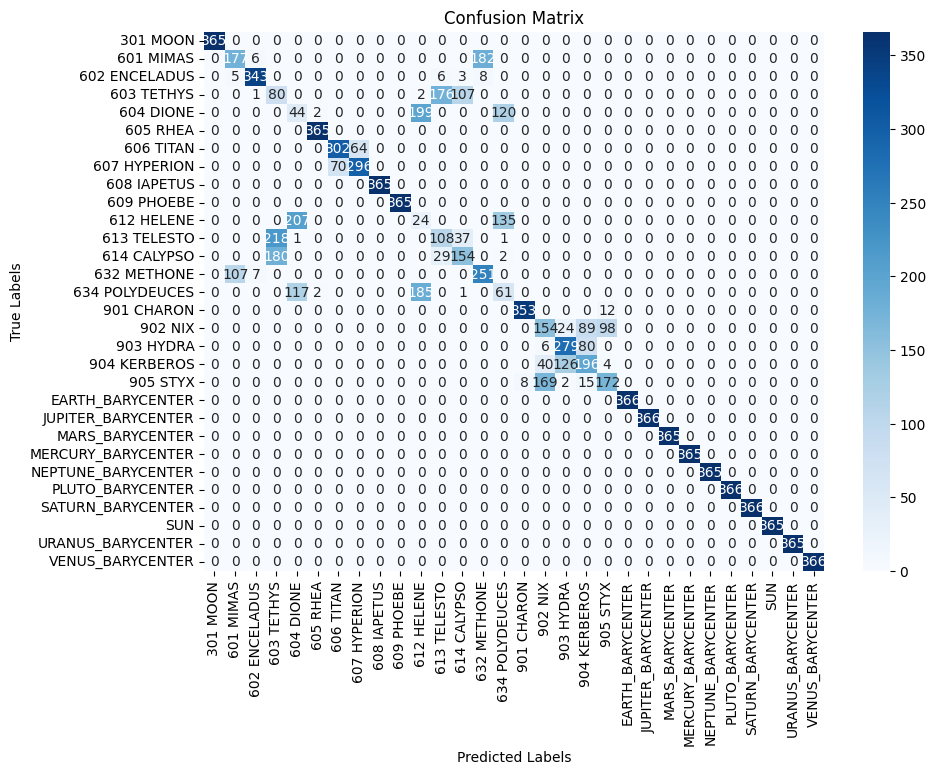

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class names for heatmap labels
# Ensure df_filtered is available from the previous cell
class_names = sorted(df_filtered['simplified_name'].unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()